In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics  as stt

In [2]:
df = pd.read_csv(r"C:\Users\SAYANTAN NANDY\Desktop\Arnab python\datasets_45152_82501_insurance_claims.csv")


In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

N    753
Y    247
Name: fraud_reported, dtype: int64

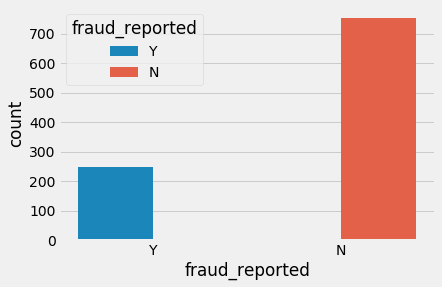

In [5]:
plt.style.use("fivethirtyeight")
ax = sns.countplot(x = 'fraud_reported', data = df , hue = "fraud_reported")
df["fraud_reported"].value_counts()

In [6]:
df.drop('_c39',axis=1,inplace=True)
#dropping an unnecessary column

In [7]:
df.isnull().sum()


months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [8]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [9]:
df['policy_state'].value_counts()
#plotting which state has maximum accidents

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

[91, 77, 79]
Index(['OH', 'IL', 'IN'], dtype='object')
Index(['OH', 'IL', 'IN'], dtype='object')
[352, 338, 310]


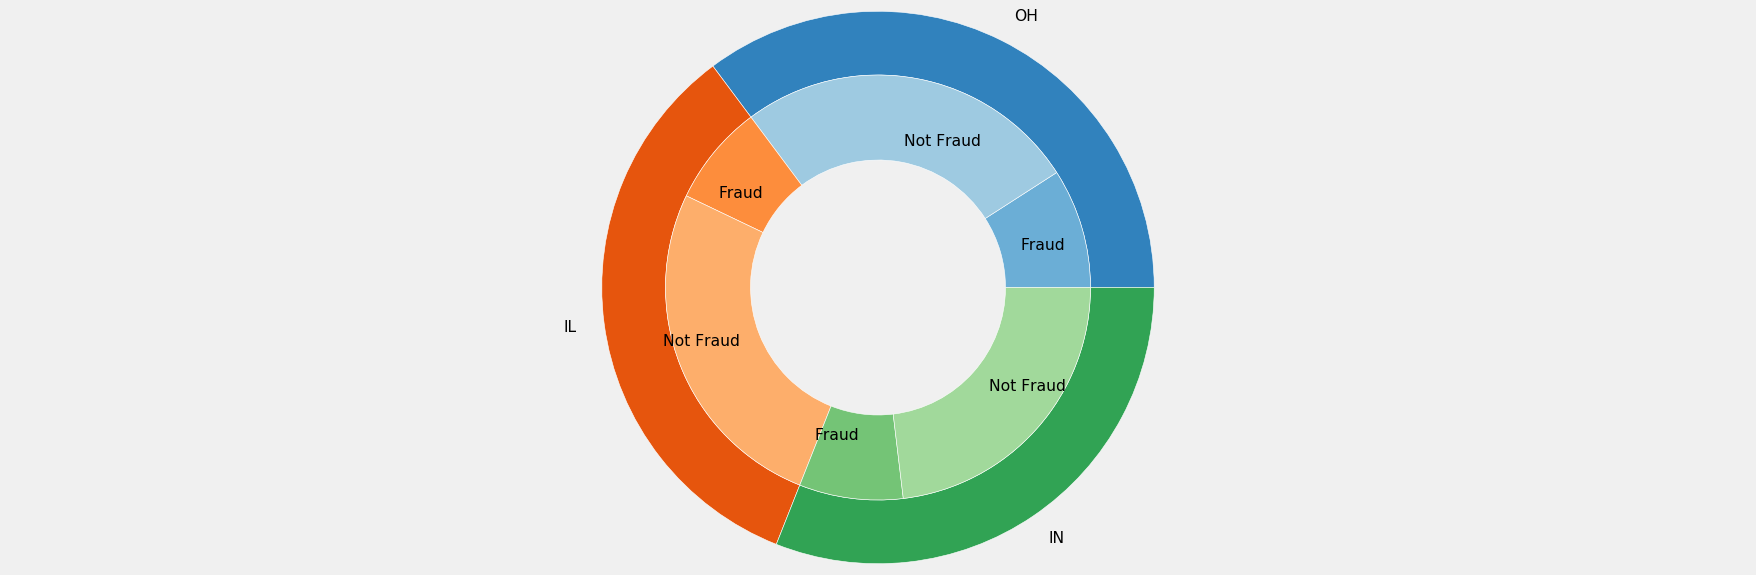

In [39]:
y_pos = df['policy_state'].value_counts().keys()
objects = y_pos
x_pos = []
for i in range(0,len(df['policy_state'].unique())):
    x_pos.append(df['policy_state'].value_counts().get(i))


y_fraud = [0]*len(objects)
for i in range(0,len(df)):
    for j in range(0,len(objects)):
        if df['policy_state'][i] == objects[j]  and df['fraud_reported'][i] == 'Y':
            y_fraud[j] = y_fraud[j]+1
print(y_fraud)
print(objects)
print(y_pos)
print(x_pos)


sub_group=[]
for i in range(0,len(x_pos)):
    sub_group.append(y_fraud[i])
    sub_group.append(x_pos[i]-y_fraud[i])
subgroup_names = ['Fraud',"Not Fraud",'Fraud',"Not Fraud",'Fraud',"Not Fraud"]
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10 ]))


fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(x_pos, radius=1.3, labels= df["policy_state"].value_counts().keys(), colors=outer_colors )
plt.setp( mypie, width=0.3, edgecolor='white')
 
mypie2, _ = ax.pie(sub_group, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=inner_colors)
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)


<function matplotlib.pyplot.show(*args, **kw)>

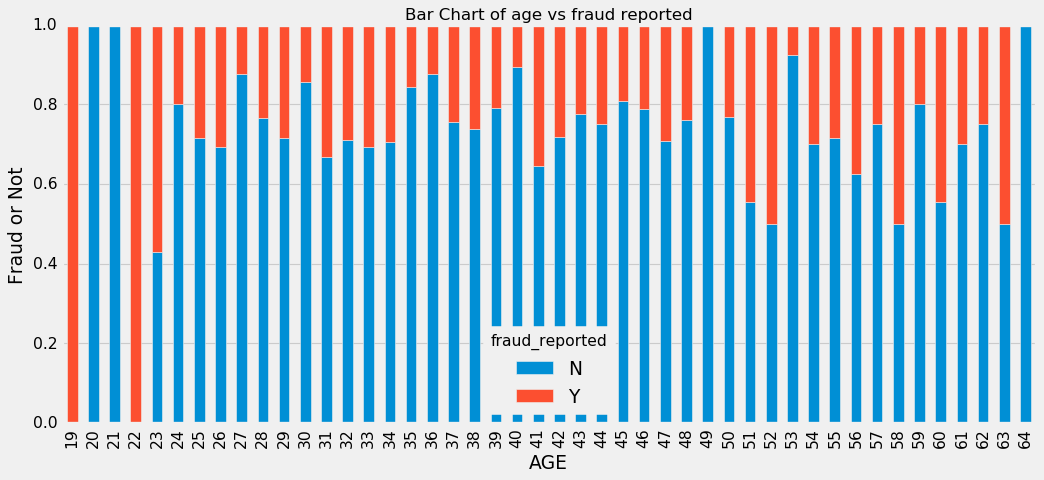

In [40]:
plt.rcParams['figure.figsize'] = [14,6]
ax = plt.style.use('fivethirtyeight')
table = pd.crosstab(df.age, df.fraud_reported)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar' ,stacked = True)
plt.title('Bar Chart of age vs fraud reported' , fontsize = 15)
plt.xlabel('AGE')
plt.ylabel('Fraud or Not')
plt.show

[39, 52, 45, 35, 42, 34]


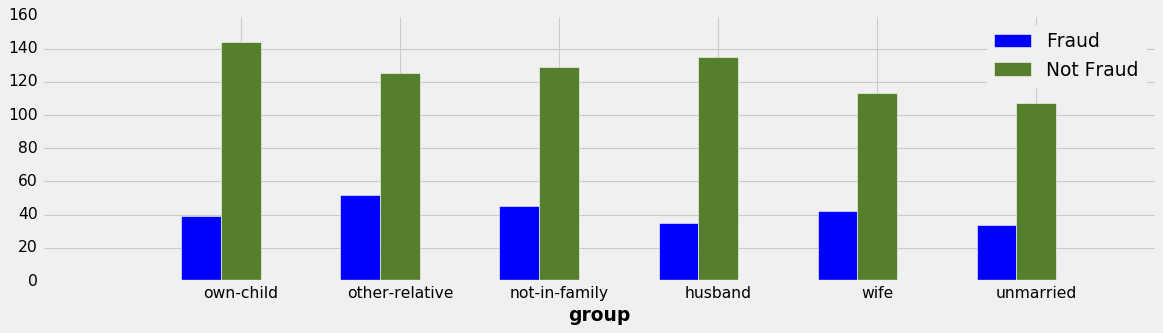

In [41]:
y_poss = df['insured_relationship'].value_counts().keys()
objects = y_poss
x_poss = []
for i in range(0,len(df['insured_relationship'].unique())):
    x_poss.append(df['insured_relationship'].value_counts().get(i))


y_fraudd = [0]*len(objects)
for i in range(0,len(df)):
    for j in range(0,len(objects)):
        if df['insured_relationship'][i] == objects[j]  and df['fraud_reported'][i] == 'Y':
            y_fraudd[j] = y_fraudd[j]+1
barWidth = 0.25
# set height of bar
bars1 = y_fraudd
bars2 = []
for i in range(0,len(x_poss)):
    bars2.append(x_poss[i]-y_fraudd[i])
print(bars1)
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.rcParams['figure.figsize'] = [16,4]
# Make the plot
plt.bar(r1, bars1, color='Blue', width=barWidth, edgecolor='white', label='Fraud')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Not Fraud')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], df["insured_relationship"].value_counts().keys())
 
# Create legend & Show graphic
plt.legend()
plt.show()


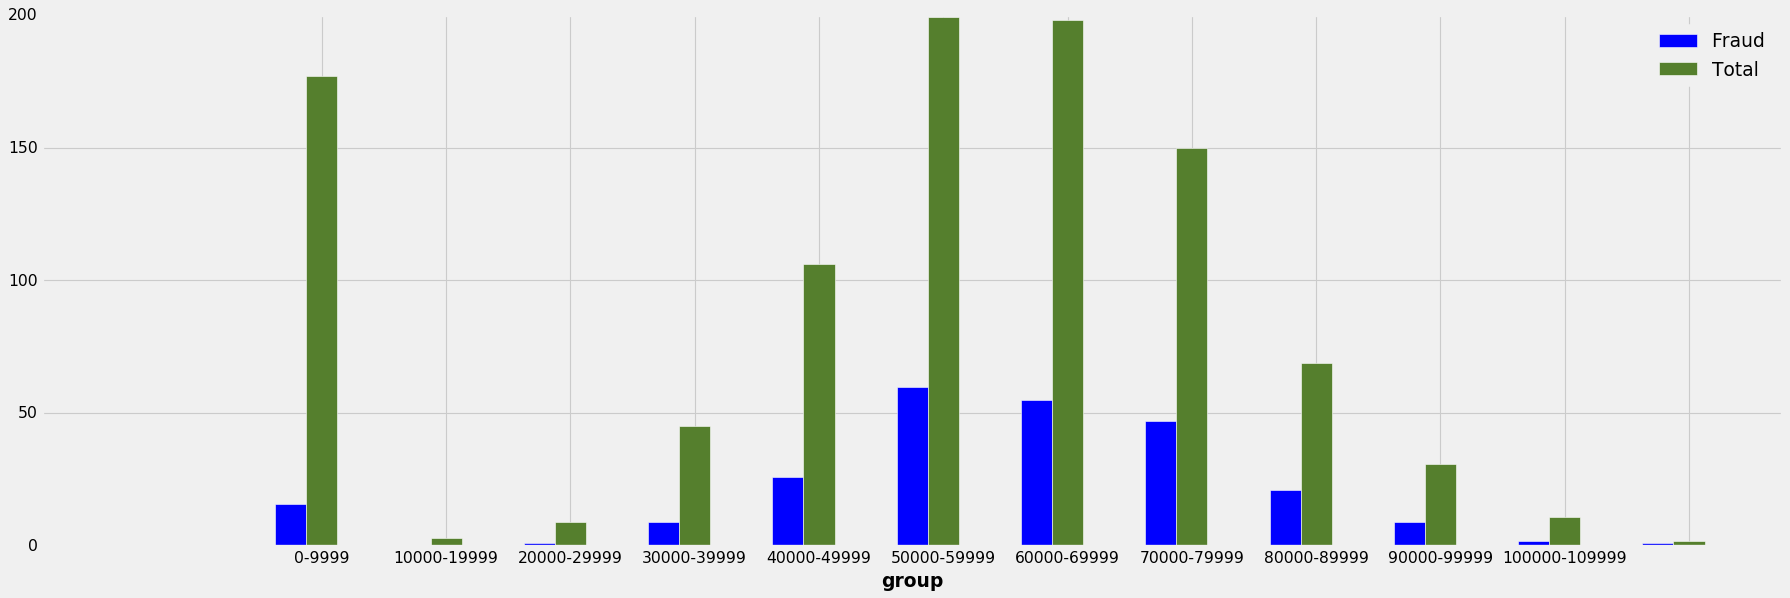

28.705
[16, 0, 1, 9, 26, 60, 55, 47, 21, 9, 2, 1]


In [42]:
data=df['total_claim_amount']
fraud=df['fraud_reported']
range_name=[]
s=0
e=9999

while e<116000:
  range_name.append(str(s)+'-'+str(e))
  s+=10000
  e+=10000
fraud_count=[]
total_count=[]
for i in range(12):
  fraud_count.append(0)
  total_count.append(0)

for i in range(1000):
  m=data[i]//10000
  total_count[m]+=1
  if fraud[i]=='Y':
    fraud_count[m]+=1

bars1 = fraud_count
bars2 = total_count

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.rcParams['figure.figsize'] = [25,8]
# Make the plot
plt.bar(r1, bars1, color='Blue', width=barWidth, edgecolor='white', label='Fraud')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Total')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], range_name)
 
# Create legend & Show graphic
plt.legend()
plt.show()

    
print((data.max()-data.min())/4000)
print(fraud_count)

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1200x640 with 0 Axes>

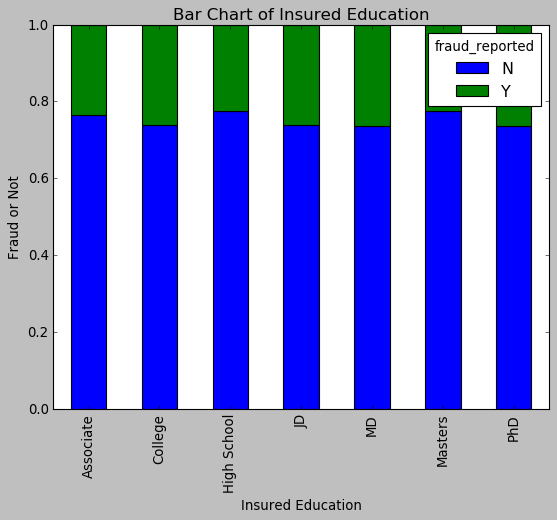

In [43]:
plt.style.use("classic")
plt.figure(figsize = (15,8))

table = pd.crosstab(df.insured_education_level ,df.fraud_reported)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar' ,stacked = True)
plt.title('Bar Chart of Insured Education' , fontsize = 15)
plt.xlabel('Insured Education')
plt.ylabel('Fraud or Not')
plt.show

[581, 358, 31, 30]


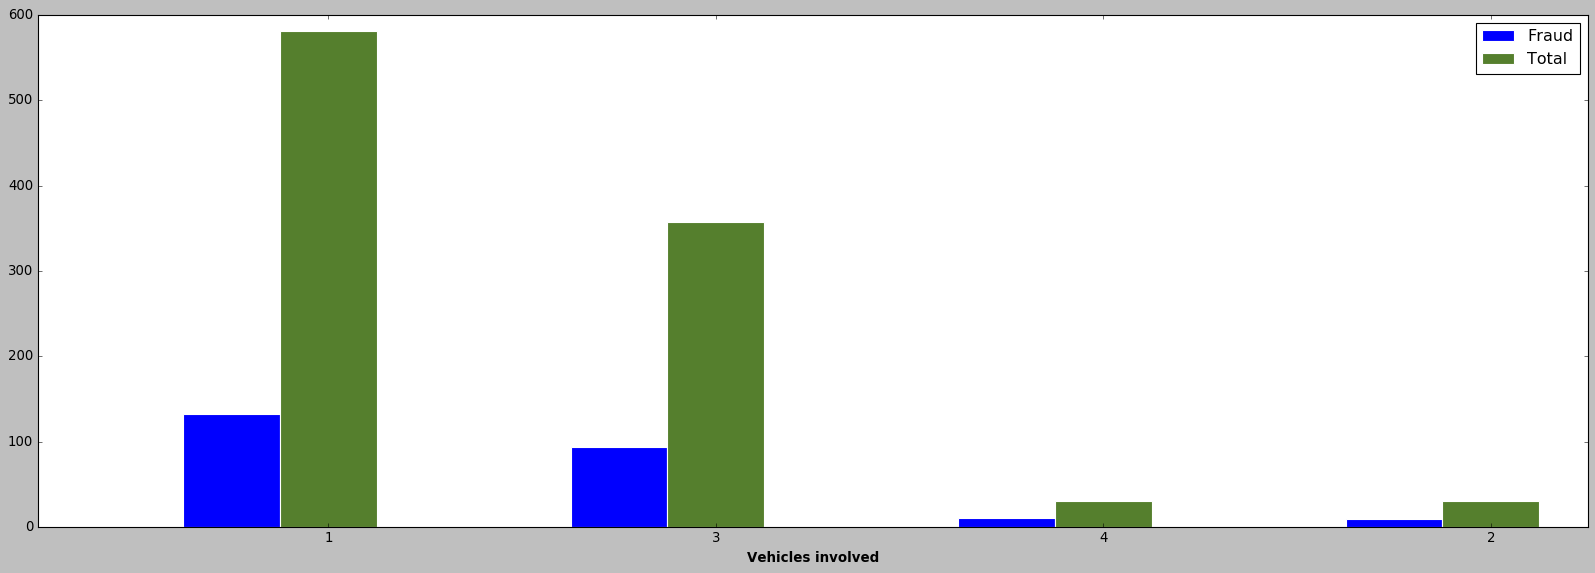

[581, 358, 31, 30]
[133, 94, 11, 9]
Int64Index([1, 3, 4, 2], dtype='int64')


In [44]:
y_poss = df['number_of_vehicles_involved'].value_counts().keys()
objects = y_poss
x_poss = []
for i in y_poss:
    x_poss.append(df['number_of_vehicles_involved'].value_counts()[i])


y_fraudd = [0]*len(objects)
for i in range(0,len(df)):
    for j in range(0,len(objects)):
        if df['number_of_vehicles_involved'][i] == objects[j]  and df['fraud_reported'][i] == 'Y':
            y_fraudd[j] = y_fraudd[j]+1
print(x_poss)
            
bars1 = y_fraudd
bars2 = x_poss

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.rcParams['figure.figsize'] = [25,8]
# Make the plot
plt.bar(r1, bars1, color='Blue', width=barWidth, edgecolor='white', label='Fraud')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Total')

# Add xticks on the middle of the group bars
plt.xlabel('Vehicles involved', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], y_poss)
 
# Create legend & Show graphic
plt.legend()
plt.show()

    
print(x_poss)
print(y_fraudd)
print(y_poss)

In [45]:
#lets do Lable enconding coding to make more features 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df[col].unique())) <= 2:
            # Train on the training data
            le.fit(df[col])
            # Transform both training and testing data
            df[col] = le.transform(df[col])
            
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

2 columns were label encoded.


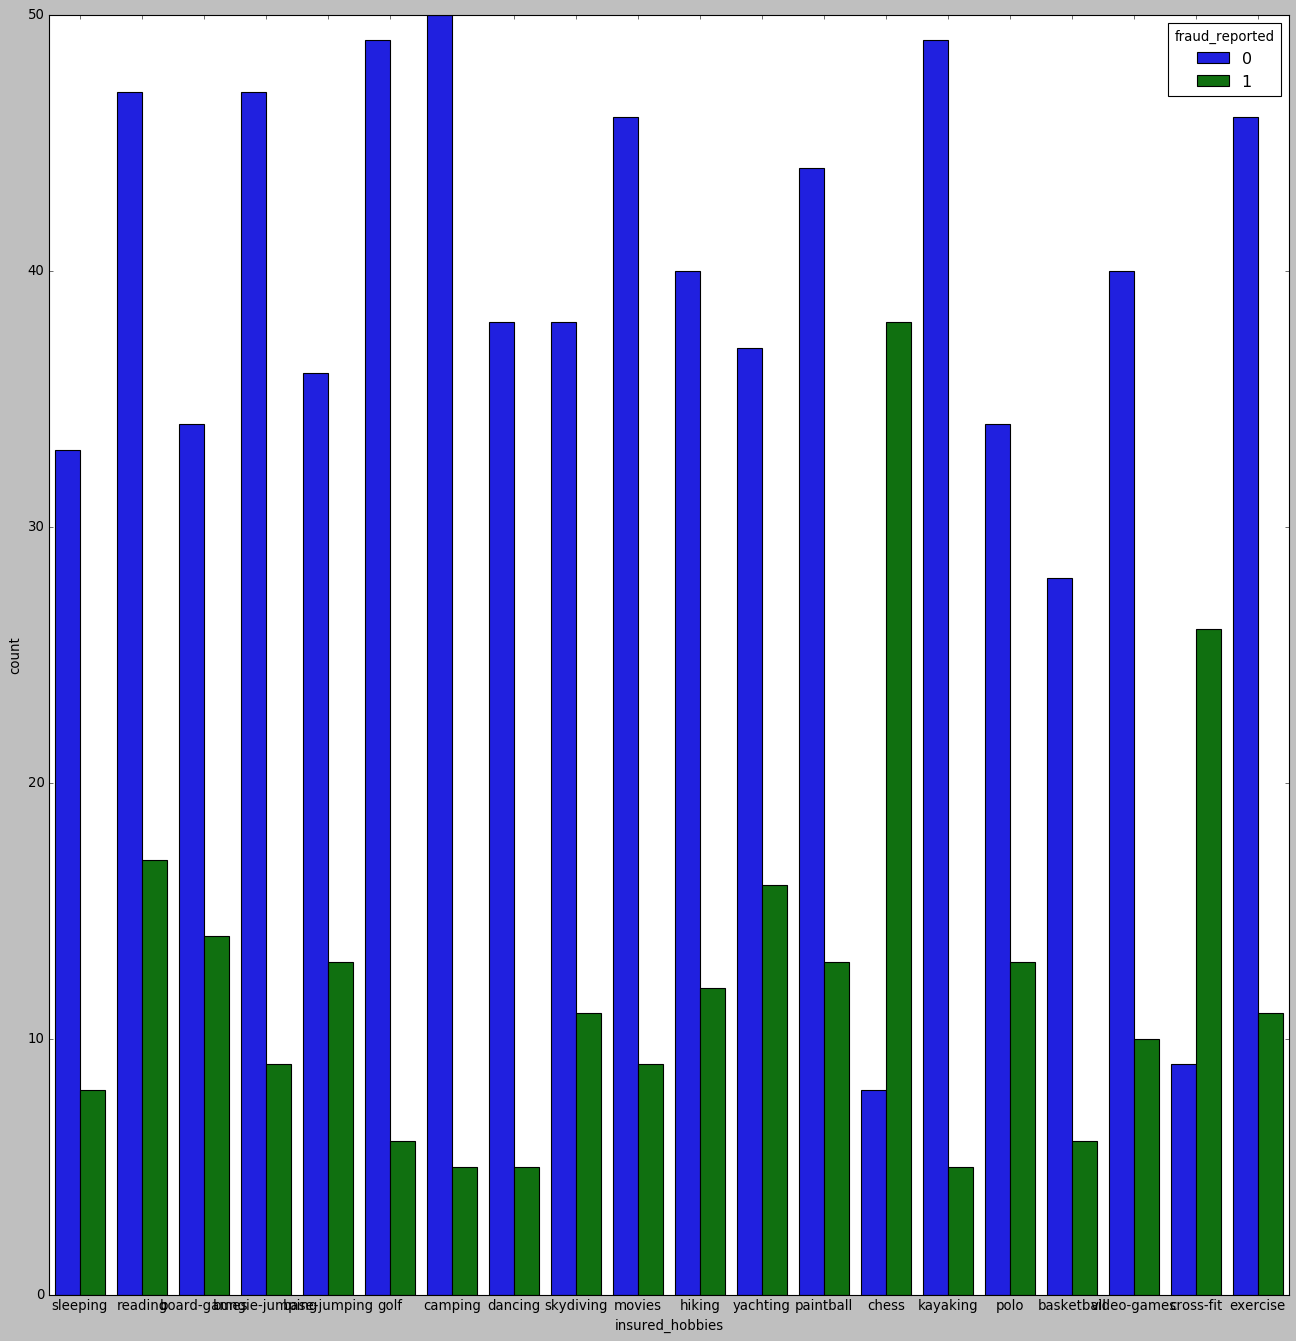

In [46]:
f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)

In [47]:
df['insured_hobbies']=df['insured_hobbies'].apply(lambda x :'Other' if x!='chess' and x!='cross-fit' else x)

In [48]:
df['insured_hobbies'].unique()

array(['Other', 'chess', 'cross-fit'], dtype=object)

In [49]:
colum_name =[]
unique_value=[]
# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        colum_name.append(str(col)) 
        unique_value.append(df[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

,Col_name,Value
14,incident_location,1000
0,policy_bind_date,951
7,incident_date,60
18,auto_model,39
4,insured_occupation,14
17,auto_make,14
3,insured_education_level,7
12,incident_state,7
13,incident_city,7
6,insured_relationship,6


In [50]:
# droping columns based on above result
df.drop(['incident_location','policy_bind_date','incident_date','auto_model','insured_occupation','policy_number'],axis=1,inplace=True)

In [51]:
df = pd.get_dummies(df)
print('Training Features shape: ', df.shape)

Training Features shape:  (1000, 92)


In [52]:
y=df['fraud_reported']
x= df.drop('fraud_reported',axis=1)

In [53]:
#logistic regression

# Splitting the dataset into training and test set.  

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3,random_state=0)

#feature Scaling  

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

#Fitting Logistic Regression to the training set  

from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)

#Predicting the test set result  
y_pred= classifier.predict(x_test)

#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[208  15]
 [ 42  35]]


In [54]:
from sklearn.metrics import accuracy_score

ac1 = accuracy_score(y_test, y_pred)
print(ac1)

0.81


In [55]:
#random forest classification

# Splitting the dataset into training and test set.

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0)

#feature Scaling  

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

#Fitting Random forest classifier to the training set

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators= 15, criterion="entropy", random_state=0)
rfc.fit(x_train, y_train)

#Predicting the test set result

y_pred= rfc.predict(x_test)

#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[209  14]
 [ 44  33]]


In [56]:
from sklearn.metrics import accuracy_score

ac2 = accuracy_score(y_test, y_pred)
print(ac2)

0.8066666666666666


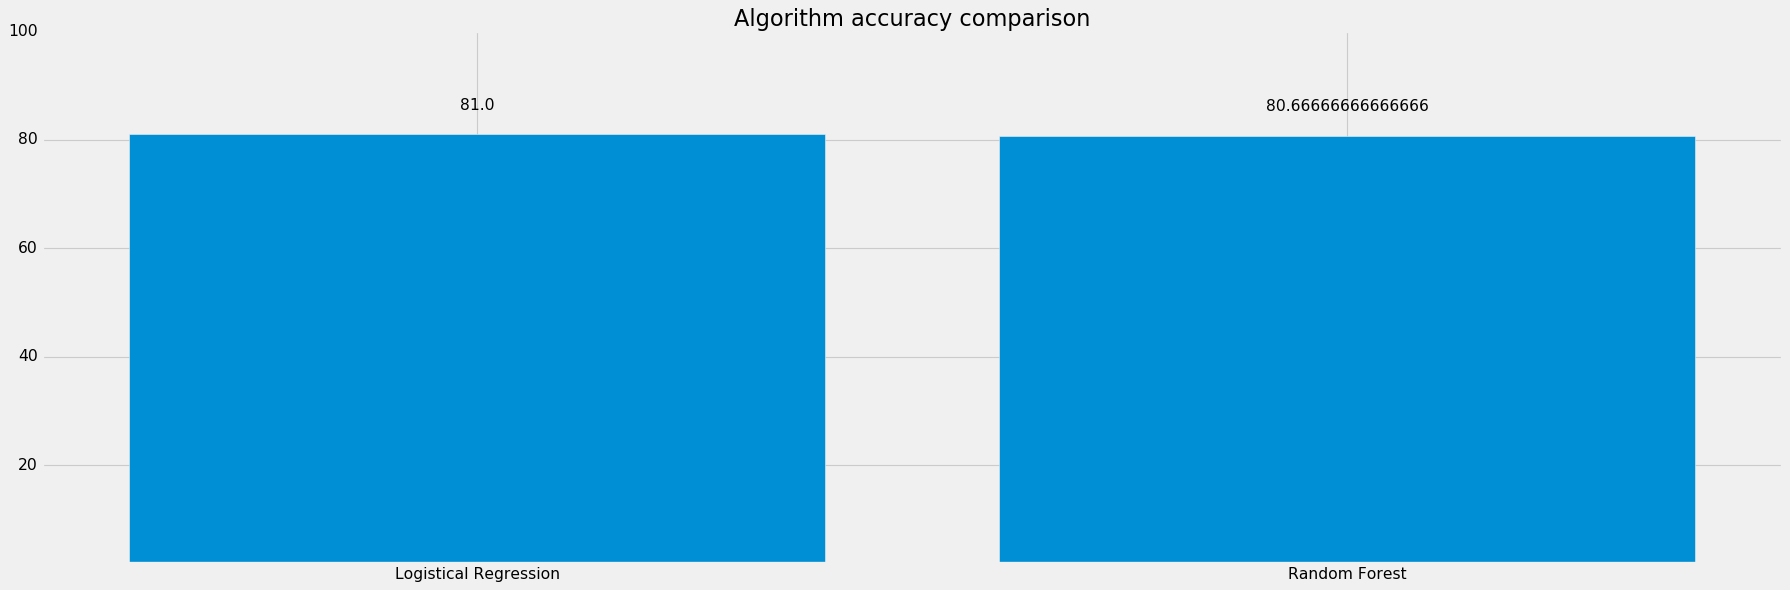

In [57]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots()

bar_x = [1,2]
bar_height = [ac1*100, ac2*100]
bar_tick_label = ['Logistical Regression' , 'Random Forest']
bar_label = [ac1*100, ac2*100]
bar_plot = plt.bar(bar_x,bar_height,tick_label=bar_tick_label)

def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0)

autolabel(bar_plot)

plt.ylim(2,100)

plt.title('Algorithm accuracy comparison')
plt.show()